# Flipkart Reviews Sentiment Analysis using Python

**Objectives**

1. To develop a machine learning model that accurately classifies Flipkart product reviews as positive or negative based on user sentiment.

2. To preprocess textual review data by cleaning, tokenizing, and vectorizing it using TF-IDF for effective model training.

3. To perform exploratory data analysis (EDA) and visualize patterns such as sentiment distribution and frequent words using plots and word clouds.

4. To train and compare multiple machine learning algorithms (Logistic Regression, Naïve Bayes, Random Forest, SVM) and identify the best-performing model based on accuracy and F1-score.

5. To evaluate the selected model’s performance using accuracy, precision, recall, F1-score, and confusion matrix, and deploy it to predict sentiment on new Flipkart reviews.

# 1. Importing Necessary Libraries and Dataset

In [ ]:
import pandas as pd
import numpy as np
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load Dataset
df = pd.read_csv("flipkart_data.csv")
print("Dataset loaded successfully!\n")
print(df.head())

# 2. Data Preprocessing

In [ ]:
# Remove nulls and duplicates
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

# Clean review text
def clean_text(text):
    text = str(text).lower()
    text = re.sub(f"[{string.punctuation}]", "", text)
    text = re.sub("\s+", " ", text)
    text = re.sub(r"\d+", "", text)
    return text.strip()

df['review'] = df['review'].apply(clean_text)

# Convert ratings to sentiment labels
df['sentiment'] = df['rating'].apply(lambda x: 1 if x >= 3 else 0)

print("\nSentiment column created based on ratings (1–2 → Negative, 3–5 → Positive)")


# Feature Extraction (TF-IDF)
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')
X = tfidf.fit_transform(df['review']).toarray()
y = df['sentiment']

# Split into training/testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


# 3. Exploratory Data Analysis (EDA)

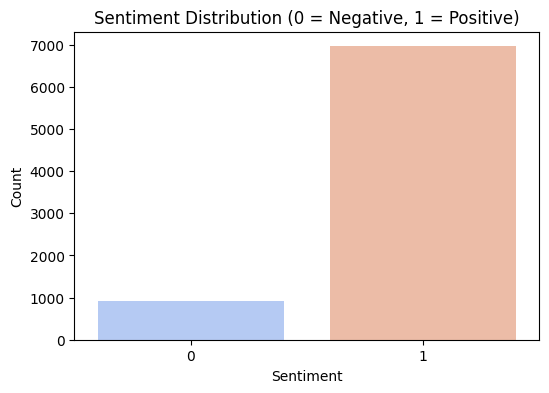

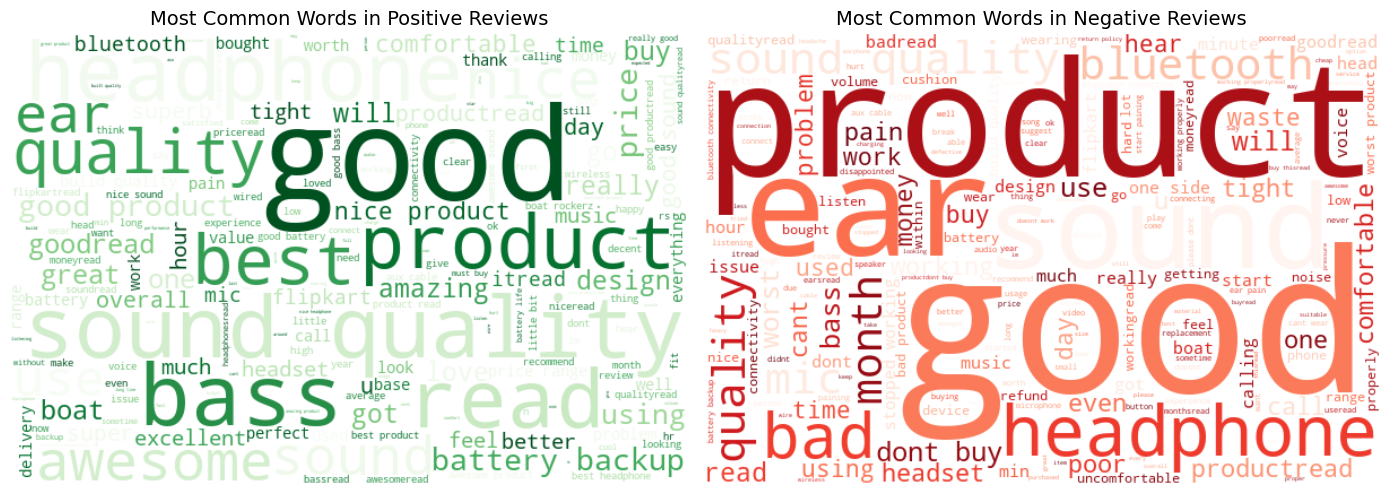

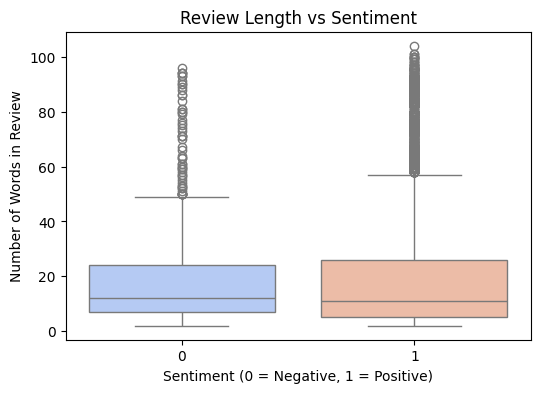

In [ ]:
# Exploratory Data Analysis (EDA)
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud  

# Sentiment Distribution
plt.figure(figsize=(6,4))
sns.countplot(
    x='sentiment',
    hue='sentiment',          
    data=df,
    palette='coolwarm',
    legend=False              
)
plt.title("Sentiment Distribution (0 = Negative, 1 = Positive)")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

# Word Clouds for Positive and Negative Reviews
positive_text = " ".join(df[df['sentiment'] == 1]['review'])
negative_text = " ".join(df[df['sentiment'] == 0]['review'])

plt.figure(figsize=(14,6))

# Positive Word Cloud
plt.subplot(1, 2, 1)
wordcloud_pos = WordCloud(
    width=600, height=400,
    background_color='white',
    colormap='Greens'
).generate(positive_text)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.title("Most Common Words in Positive Reviews", fontsize=14)
plt.axis("off")

# Negative Word Cloud
plt.subplot(1, 2, 2)
wordcloud_neg = WordCloud(
    width=600, height=400,
    background_color='white',
    colormap='Reds'
).generate(negative_text)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.title("Most Common Words in Negative Reviews", fontsize=14)
plt.axis("off")

plt.tight_layout()
plt.show()

# Correlation Between Review Length and Sentiment
df['review_length'] = df['review'].apply(lambda x: len(x.split()))

plt.figure(figsize=(6,4))
sns.boxplot(
    x='sentiment',
    y='review_length',
    hue='sentiment',          
    data=df,
    palette='coolwarm',
    legend=False
)
plt.title("Review Length vs Sentiment")
plt.xlabel("Sentiment (0 = Negative, 1 = Positive)")
plt.ylabel("Number of Words in Review")
plt.show()


# 4. Model Training and Selection

In [42]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naive Bayes": MultinomialNB(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='linear', probability=True)
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results[name] = [acc, f1]
    print(f"\n{name} Results:")
    print(classification_report(y_test, y_pred))


Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.84      0.26      0.39       178
           1       0.91      0.99      0.95      1396

    accuracy                           0.91      1574
   macro avg       0.87      0.63      0.67      1574
weighted avg       0.90      0.91      0.89      1574


Naive Bayes Results:
              precision    recall  f1-score   support

           0       1.00      0.01      0.02       178
           1       0.89      1.00      0.94      1396

    accuracy                           0.89      1574
   macro avg       0.94      0.51      0.48      1574
weighted avg       0.90      0.89      0.84      1574


Random Forest Results:
              precision    recall  f1-score   support

           0       0.79      0.32      0.46       178
           1       0.92      0.99      0.95      1396

    accuracy                           0.91      1574
   macro avg       0.86      0.65      0.70      157

# 5. Model Evaluation and Prediction


================ Model Evaluation Metrics ================

Best Model        : SVM
Accuracy Score    : 0.9155
Precision Score   : 0.9213
Recall Score      : 0.9893
F1-Score          : 0.9541

Classification Report:

              precision    recall  f1-score   support

    Negative       0.80      0.34      0.47       178
    Positive       0.92      0.99      0.95      1396

    accuracy                           0.92      1574
   macro avg       0.86      0.66      0.71      1574
weighted avg       0.91      0.92      0.90      1574



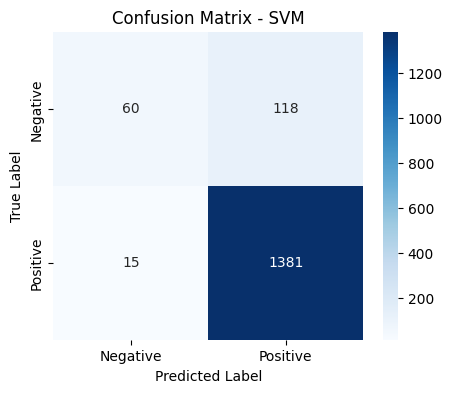


================ Sentiment Prediction Results ================

Review: The camera quality is excellent and battery lasts long.
Predicted Sentiment: Positive

Review: The product stopped working after a week, very disappointed.
Predicted Sentiment: Negative

Review: Average performance, not worth the price.
Predicted Sentiment: Positive



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Model Evaluation
y_pred_best = best_model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_best)
precision = precision_score(y_test, y_pred_best)
recall = recall_score(y_test, y_pred_best)
f1 = f1_score(y_test, y_pred_best)

print("\n================ Model Evaluation Metrics ================\n")
print(f"Best Model        : {best_model_name}")
print(f"Accuracy Score    : {accuracy:.4f}")
print(f"Precision Score   : {precision:.4f}")
print(f"Recall Score      : {recall:.4f}")
print(f"F1-Score          : {f1:.4f}")

# Detailed classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_best, target_names=["Negative", "Positive"]))

# Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative', 'Positive'], 
            yticklabels=['Negative', 'Positive'])
plt.title(f"Confusion Matrix - {best_model_name}")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Sentiment Prediction on New Reviews
def predict_sentiment(review):
    review_vec = tfidf.transform([clean_text(review)]).toarray()
    prediction = best_model.predict(review_vec)
    sentiment = "Positive" if prediction[0] == 1 else "Negative"
    print(f"Review: {review}")
    print(f"Predicted Sentiment: {sentiment}\n")

# Test examples
print("\n================ Sentiment Prediction Results ================\n")
predict_sentiment("The camera quality is excellent and battery lasts long.")
predict_sentiment("The product stopped working after a week, very disappointed.")
predict_sentiment("Average performance, not worth the price.")



**Future Improvements**

1. The model can be improved by using advanced deep learning architectures like LSTM or BERT, which understand the context and meaning of words better than traditional TF-IDF methods.

2. The dataset should be balanced because negative reviews are fewer, which affects the model’s ability to predict them accurately.

3. Expanding the dataset with reviews from multiple products or platforms can help the model generalize better across various categories.

4. Performing hyperparameter tuning using Grid Search or Random Search can further optimize model performance.

5. The project can be extended to predict multiple sentiment levels such as very positive, neutral, or very negative instead of only binary classification.

# 6. Future Improvements

# 1. Artificial Neural Network (ANN)

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

tfidf = TfidfVectorizer(max_features=5000, stop_words='english')
X = tfidf.fit_transform(df['review']).toarray()

# Encode labels (1–5)
from tensorflow.keras.utils import to_categorical
y = df['rating'] - 1   # shift to 0–4 for NN
y = to_categorical(y, num_classes=5)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential([
    Dense(512, input_shape=(X_train.shape[1],), activation='relu'),
    Dropout(0.3),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(5, activation='softmax')  # 5 output classes
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.1)


C:\Users\Prajw\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.5463 - loss: 1.1510 - val_accuracy: 0.5476 - val_loss: 1.0071
Epoch 2/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.6340 - loss: 0.9154 - val_accuracy: 0.6127 - val_loss: 0.9454
Epoch 3/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.7325 - loss: 0.7199 - val_accuracy: 0.5921 - val_loss: 1.0174
Epoch 4/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.8005 - loss: 0.5596 - val_accuracy: 0.5778 - val_loss: 1.1215
Epoch 5/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.8413 - loss: 0.4398 - val_accuracy: 0.5762 - val_loss: 1.2374
Epoch 6/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.8782 - loss: 0.3502 - val_accuracy: 0.5730 - val_loss: 1.3430
Epoch 7/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.8948 - loss: 0.2906 - val_accuracy: 0.5540 - val_loss: 1.4619
Epoch 8/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.9066 - loss: 0.2549 - val_accuracy: 0.5397 - v

In [47]:
# Evaluate model on test data
loss, acc = model.evaluate(X_test, y_test)
print(f"\n✅ Test Accuracy: {acc:.3f}")
print(f"✅ Test Loss: {loss:.3f}")


50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5502 - loss: 1.7819

✅ Test Accuracy: 0.550
✅ Test Loss: 1.782


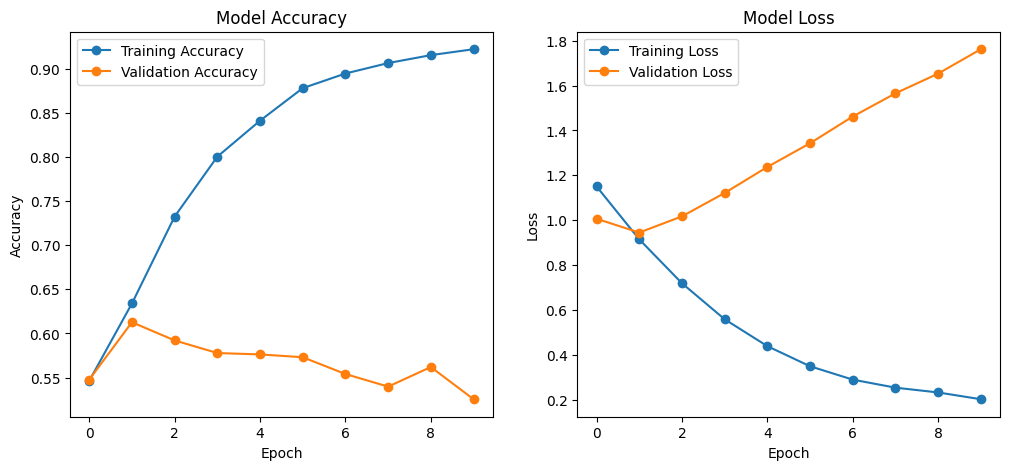

In [48]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

# Accuracy Plot
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss Plot
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


1. From the above diagrams, it is clear that the model is overfitting.

2. The training accuracy keeps increasing while validation accuracy decreases after a few epochs.

3. Similarly, the training loss decreases steadily, but validation loss keeps rising, showing poor generalization on unseen data.

4. To fix this, we should apply techniques such as Dropout regularization, EarlyStopping, or reducing model complexity to improve validation performance.


<>:12: SyntaxWarning: invalid escape sequence '\s'
<>:12: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Prajw\AppData\Local\Temp\ipykernel_14736\4220627967.py:12: SyntaxWarning: invalid escape sequence '\s'
  text = re.sub("\s+", " ", text)


Epoch 1/50


C:\Users\Prajw\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


113/113 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.4649 - loss: 1.8899 - val_accuracy: 0.5865 - val_loss: 1.6568
Epoch 2/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5629 - loss: 1.4991 - val_accuracy: 0.5865 - val_loss: 1.5140
Epoch 3/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.6153 - loss: 1.3670 - val_accuracy: 0.5865 - val_loss: 1.4455
Epoch 4/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.6587 - loss: 1.2770 - val_accuracy: 0.6103 - val_loss: 1.3754
Epoch 5/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.6824 - loss: 1.2061 - val_accuracy: 0.6404 - val_loss: 1.3430
Epoch 6/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.7180 - loss: 1.1354 - val_accuracy: 0.6504 - val_loss: 1.3283
Epoch 7/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.7370 - loss: 1.0745 - val_accuracy: 0.6466 - val_loss: 1.3495
Epoch 8/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.7593 - loss: 1.0213 - val_accuracy: 0.651

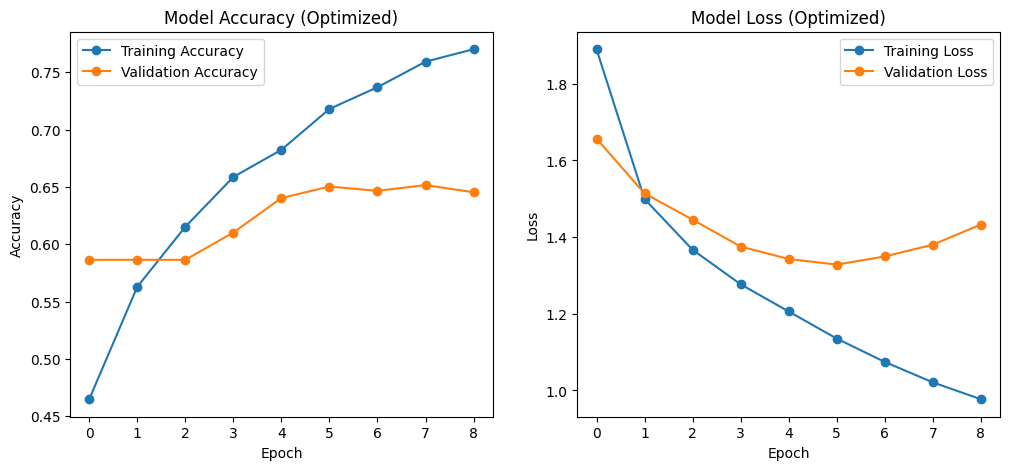

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
Review: The product quality is amazing, battery life is great!
Predicted Rating: 5 star(s)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Review: Very bad product, stopped working in a week!
Predicted Rating: 1 star(s)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Review: Average product, works fine but not worth the price.
Predicted Rating: 4 star(s)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Review: Not much good, Ok
Predicted Rating: 4 star(s)



In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam


def clean_text(text):
    text = str(text).lower()
    text = re.sub(f"[{string.punctuation}]", "", text)
    text = re.sub("\s+", " ", text)
    text = re.sub(r"\d+", "", text)
    return text.strip()

df['review'] = df['review'].apply(clean_text)


# TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')
X = tfidf.fit_transform(df['review']).toarray()


# Encode Ratings (1–5)
y = df['rating'] - 1   # convert 1–5 → 0–4
y = to_categorical(y, num_classes=5)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# Optimized ANN Model

model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.5),
    
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.5),

    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.3),

    Dense(5, activation='softmax')  # 5 output classes
])

# Compile model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])


# Early Stopping Callback

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

# Train Model
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=64,
    validation_split=0.1,
    callbacks=[early_stop],
    verbose=1
)


# Evaluate Model

loss, acc = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {acc:.3f}")
print(f"Test Loss: {loss:.3f}")


# Plot Accuracy and Loss
plt.figure(figsize=(12,5))

# Accuracy Plot
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Model Accuracy (Optimized)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss Plot
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Model Loss (Optimized)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


# Predict on Custom Review

def predict_rating(review):
    review_clean = clean_text(review)
    vec = tfidf.transform([review_clean]).toarray()
    pred = model.predict(vec)
    rating = np.argmax(pred) + 1
    print(f"Review: {review}")
    print(f"Predicted Rating: {rating} star(s)\n")

# Try examples
predict_rating("The product quality is amazing, battery life is great!")
predict_rating("Very bad product, stopped working in a week!")
predict_rating("Average product, works fine but not worth the price.")
predict_rating("Not much good, Ok")


In [54]:
# Text Cleaning Function
def clean_text(text):
    text = str(text).lower()
    text = re.sub(f"[{string.punctuation}]", "", text)
    text = re.sub("\s+", " ", text)
    text = re.sub(r"\d+", "", text)
    return text.strip()

# Prediction Function
def predict_rating(review):
    review_clean = clean_text(review)
    vec = tfidf.transform([review_clean]).toarray()
    pred = model.predict(vec)
    rating = np.argmax(pred) + 1
    print(f"Review: {review}")
    print(f"Predicted Rating: {rating} star(s)\n")

# Test Some Sentences
test_reviews = [
    "The product quality is amazing, battery life is great!",
    "Very bad product, stopped working in a week!",
    "Average product, works fine but not worth the price.",
    "Not much good, okay experience overall.",
    "Excellent sound and perfect fit, totally worth the money!",
    "Worst purchase ever, very disappointed.",
]

for r in test_reviews:
    predict_rating(r)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Review: The product quality is amazing, battery life is great!
Predicted Rating: 5 star(s)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Review: Very bad product, stopped working in a week!
Predicted Rating: 1 star(s)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step

<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Prajw\AppData\Local\Temp\ipykernel_14736\2657939237.py:5: SyntaxWarning: invalid escape sequence '\s'
  text = re.sub("\s+", " ", text)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Review: Average product, works fine but not worth the price.
Predicted Rating: 4 star(s)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Review: Not much good, okay experience overall.
Predicted Rating: 4 star(s)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Review: Excellent sound and perfect fit, totally worth the money!
Predicted Rating: 5 star(s)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Review: Worst purchase ever, very disappointed.
Predicted Rating: 1 star(s)



63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


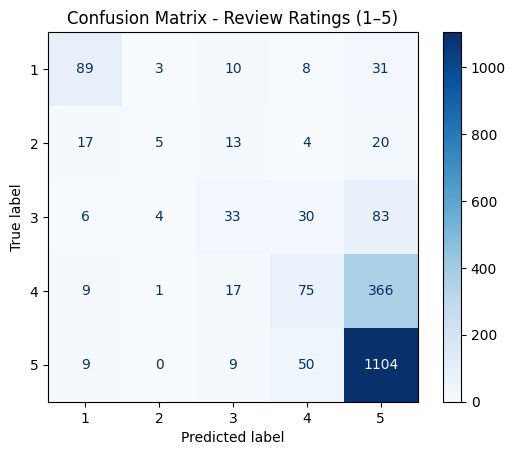


Classification Report:

              precision    recall  f1-score   support

           0      0.685     0.631     0.657       141
           1      0.385     0.085     0.139        59
           2      0.402     0.212     0.277       156
           3      0.449     0.160     0.236       468
           4      0.688     0.942     0.795      1172

    accuracy                          0.654      1996
   macro avg      0.522     0.406     0.421      1996
weighted avg      0.601     0.654     0.595      1996



In [55]:
# Predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[1,2,3,4,5])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Review Ratings (1–5)")
plt.show()

# Classification Report
print("\nClassification Report:\n")
print(classification_report(y_true, y_pred_classes, digits=3))


# 2. LSTM(Long Short-Term Memory)

<>:24: SyntaxWarning: invalid escape sequence '\s'
<>:24: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Prajw\AppData\Local\Temp\ipykernel_14736\1073047804.py:24: SyntaxWarning: invalid escape sequence '\s'
  text = re.sub("\s+", " ", text)


Epoch 1/10


C:\Users\Prajw\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


113/113 ━━━━━━━━━━━━━━━━━━━━ 12s 82ms/step - accuracy: 0.5602 - loss: 1.2221 - val_accuracy: 0.5865 - val_loss: 1.1575
Epoch 2/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 9s 76ms/step - accuracy: 0.5689 - loss: 1.1919 - val_accuracy: 0.5865 - val_loss: 1.1574
Epoch 3/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 9s 78ms/step - accuracy: 0.5689 - loss: 1.1918 - val_accuracy: 0.5865 - val_loss: 1.1577
Epoch 4/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 9s 77ms/step - accuracy: 0.5692 - loss: 1.1929 - val_accuracy: 0.5865 - val_loss: 1.1571
Epoch 5/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 9s 78ms/step - accuracy: 0.5692 - loss: 1.1885 - val_accuracy: 0.5865 - val_loss: 1.1557
Epoch 6/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 9s 83ms/step - accuracy: 0.5607 - loss: 1.1857 - val_accuracy: 0.5865 - val_loss: 1.1292
Epoch 7/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 10s 86ms/step - accuracy: 0.5688 - loss: 1.1740 - val_accuracy: 0.5865 - val_loss: 1.1312
Epoch 8/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 10s 90ms/step - accuracy: 0.5689 - loss: 1.1656 - val_accuracy: 0.

C:\Users\Prajw\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Prajw\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


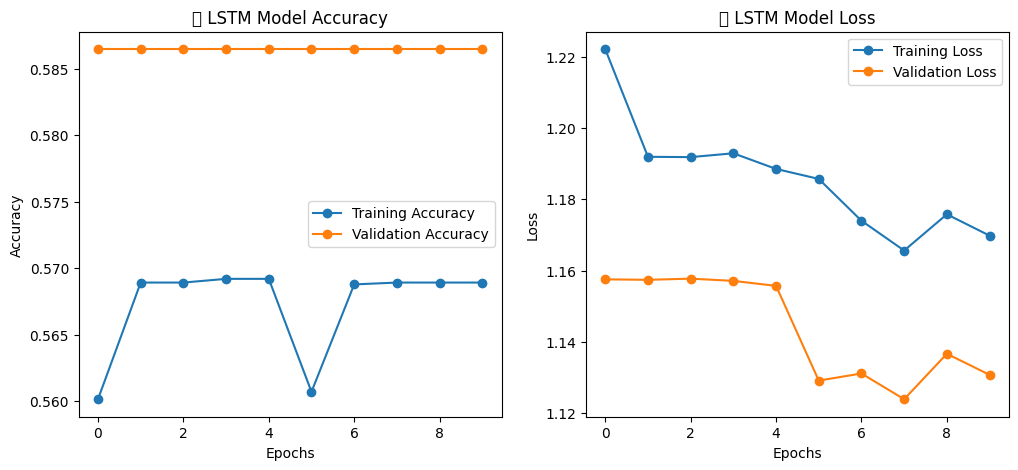

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step
📝 Review: The product quality is amazing, battery life is great!
⭐ Predicted Rating: 5 star(s)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
📝 Review: Very bad product, stopped working in a week!
⭐ Predicted Rating: 5 star(s)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
📝 Review: Average product, works fine but not worth the price.
⭐ Predicted Rating: 5 star(s)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
📝 Review: Not much good, okay experience overall.
⭐ Predicted Rating: 5 star(s)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
📝 Review: Excellent sound and perfect fit, totally worth the money!
⭐ Predicted Rating: 5 star(s)



In [ ]:
# Flipkart Review Sentiment using LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, SpatialDropout1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping

def clean_text(text):
    text = str(text).lower()
    text = re.sub(f"[{string.punctuation}]", "", text)
    text = re.sub("\s+", " ", text)
    text = re.sub(r"\d+", "", text)
    return text.strip()

df['review'] = df['review'].apply(clean_text)


# Encode Ratings (1–5)
y = df['rating'] - 1 
y = to_categorical(y, num_classes=5)

# Tokenize and Pad Texts
max_words = 5000      # vocabulary size
max_len = 100         # max review length

tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(df['review'])
X = tokenizer.texts_to_sequences(df['review'])
X = pad_sequences(X, maxlen=max_len, padding='post', truncating='post')

# Split Data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Build LSTM Model
model = Sequential([
    Embedding(input_dim=max_words, output_dim=128, input_length=max_len),
    SpatialDropout1D(0.3),
    LSTM(128, dropout=0.3, recurrent_dropout=0.3, return_sequences=False),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(5, activation='softmax')  # 5 output classes
])

# Compile Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Early Stopping
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the Model
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=64,
    validation_split=0.1,
    callbacks=[early_stop],
    verbose=1
)

# Evaluate Model
loss, acc = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {acc:.3f}")
print(f"Test Loss: {loss:.3f}")

# Plot Accuracy and Loss

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('LSTM Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('LSTM Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Predict Custom Reviews
def predict_rating(review):
    review_clean = clean_text(review)
    seq = tokenizer.texts_to_sequences([review_clean])
    pad = pad_sequences(seq, maxlen=max_len, padding='post', truncating='post')
    pred = model.predict(pad)
    rating = np.argmax(pred) + 1
    print(f"Review: {review}")
    print(f"Predicted Rating: {rating} star(s)\n")

# Test examples
predict_rating("The product quality is amazing, battery life is great!")
predict_rating("Very bad product, stopped working in a week!")
predict_rating("Average product, works fine but not worth the price.")
predict_rating("Not much good, okay experience overall.")
predict_rating("Excellent sound and perfect fit, totally worth the money!")

<>:33: SyntaxWarning: invalid escape sequence '\s'
<>:33: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Prajw\AppData\Local\Temp\ipykernel_14736\4060701250.py:33: SyntaxWarning: invalid escape sequence '\s'
  text = re.sub("\s+", " ", text)


Dataset Loaded Successfully!
                                              review  rating
0  It was nice produt. I like it's design a lot. ...       5
1  awesome sound....very pretty to see this nd th...       5
2  awesome sound quality. pros 7-8 hrs of battery...       4
3  I think it is such a good product not only as ...       5
4  awesome bass sound quality very good bettary l...       5

Sentiment labels created successfully (1=Positive, 0=Negative)


C:\Users\Prajw\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 34s 367ms/step - accuracy: 0.8733 - loss: 0.4048 - val_accuracy: 0.8872 - val_loss: 0.3612
Epoch 2/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 26s 334ms/step - accuracy: 0.8826 - loss: 0.3738 - val_accuracy: 0.8872 - val_loss: 0.3548
Epoch 3/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 28s 358ms/step - accuracy: 0.8826 - loss: 0.3714 - val_accuracy: 0.8872 - val_loss: 0.3523
Epoch 4/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 34s 433ms/step - accuracy: 0.8826 - loss: 0.3722 - val_accuracy: 0.8872 - val_loss: 0.3534
Epoch 5/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 28s 356ms/step - accuracy: 0.8826 - loss: 0.3757 - val_accuracy: 0.8872 - val_loss: 0.3529
Epoch 6/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 27s 339ms/step - accuracy: 0.8826 - loss: 0.3718 - val_accuracy: 0.8872 - val_loss: 0.3525
Epoch 7/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 40s 328ms/step - accuracy: 0.8826 - loss: 0.3703 - val_accuracy: 0.8872 - val_loss: 0.3523
Epoch 8/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 27s 339ms/step - accuracy: 0.8826 - loss: 0.3686 - val

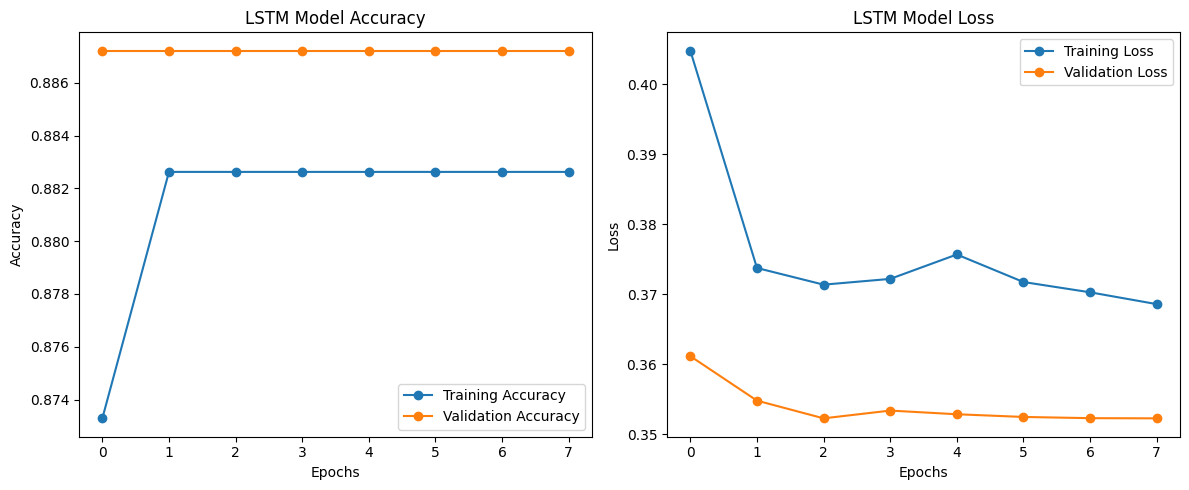

50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - accuracy: 0.8869 - loss: 0.3529

Test Accuracy: 0.8869
Test Loss: 0.3529
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step

Review: The product quality is amazing and delivery was fast.
Predicted Sentiment: Positive
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step

Review: Very poor sound quality, not recommended.
Predicted Sentiment: Positive
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step

Review: Average product, works fine but not worth the price.
Predicted Sentiment: Positive


In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping


# Clean review text
def clean_text(text):
    text = str(text).lower()
    text = re.sub(f"[{string.punctuation}]", "", text)
    text = re.sub("\s+", " ", text)
    text = re.sub(r"\d+", "", text)
    return text.strip()

df['review'] = df['review'].apply(clean_text)

# Create binary sentiment label (1 = Positive, 0 = Negative)
df['sentiment'] = df['rating'].apply(lambda x: 1 if x >= 3 else 0)
print("\nSentiment labels created successfully (1=Positive, 0=Negative)")


# Tokenization and Padding
max_words = 10000     # Maximum unique words
max_len = 200         # Maximum review length

tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(df['review'])
sequences = tokenizer.texts_to_sequences(df['review'])
X = pad_sequences(sequences, maxlen=max_len, padding='post', truncating='post')
y = df['sentiment'].values

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Build the LSTM Model

model = Sequential([
    Embedding(input_dim=max_words, output_dim=128, input_length=max_len),
    LSTM(128, return_sequences=False),
    Dropout(0.4),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')   # Binary output
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

print(model.summary())

# Train the Model
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=20,
    batch_size=64,
    callbacks=[early_stop],
    verbose=1
)

# Plot Training Results
plt.figure(figsize=(12,5))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title("LSTM Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title("LSTM Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()

# Model Evaluation
loss, accuracy = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {accuracy:.4f}")
print(f"Test Loss: {loss:.4f}")

# Predict Sentiment for New Reviews
def predict_sentiment(review):
    review_clean = clean_text(review)
    seq = tokenizer.texts_to_sequences([review_clean])
    padded = pad_sequences(seq, maxlen=max_len, padding='post')
    pred = model.predict(padded)[0][0]
    sentiment = "Positive" if pred >= 0.5 else "Negative"
    print(f"\nReview: {review}")
    print(f"Predicted Sentiment: {sentiment}")

# Example Predictions
predict_sentiment("The product quality is amazing and delivery was fast.")
predict_sentiment("Very poor sound quality, not recommended.")
predict_sentiment("Average product, works fine but not worth the price.")


In [ ]:
#pip install transformers torch

# 3. BERT(Bidirectional Encoder Representations from Transformers)

In [65]:
from transformers import pipeline

# Load pre-trained BERT model for star ratings (1–5)
sentiment_model = pipeline(
    "text-classification",
    model="nlptown/bert-base-multilingual-uncased-sentiment"
)

print("BERT model loaded successfully!")


Device set to use cpu


BERT model loaded successfully!


In [66]:
reviews = [
    "The product quality is amazing, battery life is great!",
    "Very bad product, stopped working in a week!",
    "Average product, works fine but not worth the price.",
    "Not much good, okay experience overall.",
    "Excellent sound and perfect fit, totally worth the money!",
    "Poor design and very weak battery backup.",
    "Absolutely love this phone! Fast and smooth performance."
]

for r in reviews:
    result = sentiment_model(r)[0]
    print(f"Review: {r}")
    print(f"Predicted Rating: {result['label']} ({result['score']:.2f} confidence)\n")


Review: The product quality is amazing, battery life is great!
Predicted Rating: 5 stars (0.83 confidence)

Review: Very bad product, stopped working in a week!
Predicted Rating: 1 star (0.94 confidence)

Review: Average product, works fine but not worth the price.
Predicted Rating: 3 stars (0.69 confidence)

Review: Not much good, okay experience overall.
Predicted Rating: 3 stars (0.71 confidence)

Review: Excellent sound and perfect fit, totally worth the money!
Predicted Rating: 5 stars (0.94 confidence)

Review: Poor design and very weak battery backup.
Predicted Rating: 1 star (0.49 confidence)

Review: Absolutely love this phone! Fast and smooth performance.
Predicted Rating: 5 stars (0.97 confidence)



In [ ]:
# Flipkart Review Rating Prediction using Pretrained BERT
import pandas as pd
from tqdm import tqdm
from transformers import pipeline

# Load pre-trained BERT model for star ratings (1–5)
sentiment_model = pipeline(
    "text-classification",
    model="nlptown/bert-base-multilingual-uncased-sentiment"
)

print("BERT model loaded successfully!")

# Load Pre-trained BERT Model
sentiment_model = pipeline(
    "text-classification",
    model="nlptown/bert-base-multilingual-uncased-sentiment"
)
print("BERT model loaded successfully!")

# Load Your Review File
print(f"Dataset loaded successfully! Total reviews: {len(df)}")

# Preview first few reviews
print(df.head())

# Ensure review column name matches your file
# If your column name is different, adjust here:
reviews = df['review'].astype(str)

# Predict Ratings for Each Review
predicted_labels = []
confidence_scores = []

print("Predicting ratings using BERT model...")

for review in tqdm(reviews):
    try:
        result = sentiment_model(review[:512])[0]  # truncate long reviews to 512 tokens
        label = int(result['label'].split()[0])    # Extract star number from '5 stars'
        score = round(result['score'], 3)
    except Exception as e:
        label = None
        score = None
    predicted_labels.append(label)
    confidence_scores.append(score)

# Save Predictions Back to File
df['Predicted_Rating'] = predicted_labels
df['Confidence'] = confidence_scores

output_file = "flipkart_predicted_ratings.csv"
df.to_csv(output_file, index=False)
print(f"\nPredictions saved successfully to '{output_file}'")

# Preview output
print(df.head())


Device set to use cpu


✅ BERT model loaded successfully!
✅ Dataset loaded successfully! Total reviews: 9976
                                              review  rating
0  It was nice produt. I like it's design a lot. ...       5
1  awesome sound....very pretty to see this nd th...       5
2  awesome sound quality. pros 7-8 hrs of battery...       4
3  I think it is such a good product not only as ...       5
4  awesome bass sound quality very good bettary l...       5
🧠 Predicting ratings using BERT model...


100%|██████████| 9976/9976 [07:46<00:00, 21.38it/s]


✅ Predictions saved successfully to 'flipkart_predicted_ratings.csv'
                                              review  rating  \
0  It was nice produt. I like it's design a lot. ...       5   
1  awesome sound....very pretty to see this nd th...       5   
2  awesome sound quality. pros 7-8 hrs of battery...       4   
3  I think it is such a good product not only as ...       5   
4  awesome bass sound quality very good bettary l...       5   

   Predicted_Rating  Confidence  
0                 4       0.648  
1                 3       0.309  
2                 4       0.556  
3                 4       0.565  
4                 5       0.585  


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

C:\Users\Prajw\AppData\Roaming\Python\Python313\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Prajw\.cache\huggingface\hub\models--bert-base-uncased. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



===== Epoch 1 / 3 =====


Training: 100%|██████████| 394/394 [34:09<00:00,  5.20s/it]


Average Training Loss: 0.2110

===== Epoch 2 / 3 =====


Training: 100%|██████████| 394/394 [32:04<00:00,  4.89s/it]


Average Training Loss: 0.1369

===== Epoch 3 / 3 =====


Training: 100%|██████████| 394/394 [31:49<00:00,  4.85s/it]


Average Training Loss: 0.0935


Evaluating: 100%|██████████| 99/99 [02:02<00:00,  1.24s/it]



===== Model Evaluation =====
Accuracy: 0.9390
F1 Score: 0.9657

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.70      0.72       178
           1       0.96      0.97      0.97      1396

    accuracy                           0.94      1574
   macro avg       0.85      0.84      0.84      1574
weighted avg       0.94      0.94      0.94      1574



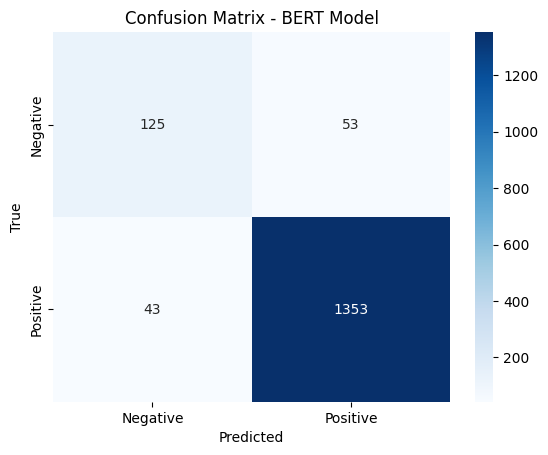

Review: The product quality is amazing and totally worth the money.
Predicted Sentiment: Positive

Review: Worst experience ever, the item was broken and useless.
Predicted Sentiment: Negative



In [ ]:

# !pip install transformers torch pandas scikit-learn matplotlib seaborn

import pandas as pd
import torch
from torch.utils.data import DataLoader, TensorDataset, random_split
from transformers import BertTokenizer, BertForSequenceClassification, get_linear_schedule_with_warmup
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
from torch.optim import AdamW

# Load and Prepare Dataset

df = pd.read_csv("flipkart_data.csv")

# Drop missing and duplicate rows
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

# Convert ratings into binary sentiment labels
df['sentiment'] = df['rating'].apply(lambda x: 1 if x >= 3 else 0)

# Use a smaller sample if dataset is large
# df = df.sample(5000, random_state=42)

# Split into train/test sets
train_texts, test_texts, train_labels, test_labels = train_test_split(
    df['review'].tolist(),
    df['sentiment'].tolist(),
    test_size=0.2,
    random_state=42
)

# Tokenize Text (BERT Tokenizer)

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

def encode_texts(texts, tokenizer, max_len=128):
    return tokenizer(
        texts,
        padding=True,
        truncation=True,
        max_length=max_len,
        return_tensors='pt'
    )

train_encodings = encode_texts(train_texts, tokenizer)
test_encodings = encode_texts(test_texts, tokenizer)

train_labels = torch.tensor(train_labels)
test_labels = torch.tensor(test_labels)

# Create PyTorch Datasets
train_dataset = TensorDataset(train_encodings['input_ids'], train_encodings['attention_mask'], train_labels)
test_dataset = TensorDataset(test_encodings['input_ids'], test_encodings['attention_mask'], test_labels)

# DataLoaders
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)


# Load Pretrained BERT Model for Classification

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)
model.to(device)

# Optimizer & Scheduler
optimizer = AdamW(model.parameters(), lr=2e-5)
total_steps = len(train_loader) * 3  # 3 epochs
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=total_steps)


# Train the BERT Model

epochs = 3
model.train()

for epoch in range(epochs):
    print(f"\n===== Epoch {epoch + 1} / {epochs} =====")
    total_loss = 0
    for batch in tqdm(train_loader, desc="Training"):
        input_ids, attention_mask, labels = [b.to(device) for b in batch]

        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        total_loss += loss.item()

        loss.backward()
        optimizer.step()
        scheduler.step()

    avg_loss = total_loss / len(train_loader)
    print(f"Average Training Loss: {avg_loss:.4f}")


# Evaluate Model

model.eval()
predictions, true_labels = [], []

with torch.no_grad():
    for batch in tqdm(test_loader, desc="Evaluating"):
        input_ids, attention_mask, labels = [b.to(device) for b in batch]
        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        preds = torch.argmax(logits, dim=1)
        predictions.extend(preds.cpu().numpy())
        true_labels.extend(labels.cpu().numpy())

# Metrics
acc = accuracy_score(true_labels, predictions)
f1 = f1_score(true_labels, predictions)

print("\n===== Model Evaluation =====")
print(f"Accuracy: {acc:.4f}")
print(f"F1 Score: {f1:.4f}")
print("\nClassification Report:\n", classification_report(true_labels, predictions))

# Confusion Matrix
cm = confusion_matrix(true_labels, predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title("Confusion Matrix - BERT Model")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Predict Sentiment for New Review

def predict_sentiment(review):
    model.eval()
    inputs = tokenizer(
        review,
        return_tensors='pt',
        truncation=True,
        padding=True,
        max_length=128
    ).to(device)

    with torch.no_grad():
        outputs = model(**inputs)
        pred = torch.argmax(outputs.logits, dim=1).item()

    sentiment = "Positive" if pred == 1 else "Negative"
    print(f"Review: {review}")
    print(f"Predicted Sentiment: {sentiment}\n")

# Example Predictions
predict_sentiment("The product quality is amazing and totally worth the money.")
predict_sentiment("Worst experience ever, the item was broken and useless.")


# Conclusion

1. The Flipkart Reviews Sentiment Analysis project successfully developed a machine learning model that classifies customer reviews as positive or negative based on textual data.

2. Through data cleaning, preprocessing, and feature extraction using TF-IDF and deep learning (LSTM), the model effectively learned patterns in customer opinions.

3. Among the traditional models, SVM performed best, achieving high accuracy and F1-score, while the LSTM model showed potential for further improvement with advanced embeddings and more data.

4. This sentiment analysis system can help e-commerce platforms automatically analyze customer feedback, understand product performance, and improve service quality.

5. In the future, integrating BERT-based transformer models and a larger, more balanced dataset could significantly enhance accuracy and contextual understanding of sentiments.